Jessica: Analysis of trends/correlations between health factors and sleep disorders. 

Question: Does lack of sleep cause certain health problems in patients with diagnosed sleep disorders versus patients without sleep disorders?

Null Hypothesis: There is no significant relationship between health factors (Blood pressure, Heart rate, BMI) and patients with sleep disorders. No difference between these factors between patients with a disorder and patients without. 

Alternative Hypothesis: There is significant cause and effect between health factors (Blood pressure, Heart rate, BMI) and patients with sleep disorders. 

In [1]:
import pandas as pd
from pathlib import Path
import scipy.stats as stats
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
sleep_data = Path("Sleep_Study/Sleep_health_and_lifestyle_dataset.csv")

sleep_data_pd = pd.read_csv(sleep_data)

sleep_data_pd.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
sleep_data_pd[['systolic blood pressure','diastolic blood pressure']] = sleep_data_pd['Blood Pressure'].str.split("/", expand=True).astype(float)
sleep_data_pd.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic blood pressure,diastolic blood pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [4]:
sleep_data_pd['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [5]:
sleep_cleaned = sleep_data_pd[['Person ID','Sleep Duration', 'Quality of Sleep','BMI Category','systolic blood pressure','diastolic blood pressure','Heart Rate','Sleep Disorder']]

In [6]:
health_stat_table1 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None'].agg({'Sleep Duration':["mean", "median","var","std","sem"]})
health_stat_table2 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None'].agg({'Quality of Sleep':["mean", "median","var","std","sem"]})
health_stat_table3 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None'].agg({'Heart Rate':["mean", "median","var","std","sem"]})
health_stat_table4 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None'].agg({'systolic blood pressure':["mean", "median","var","std","sem"]})
health_stat_table5 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None'].agg({'diastolic blood pressure':["mean", "median","var","std","sem"]})

health_stat_table6 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea'].agg({'Sleep Duration':["mean", "median","var","std","sem"]})
health_stat_table7 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea'].agg({'Quality of Sleep':["mean", "median","var","std","sem"]})
health_stat_table8 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea'].agg({'Heart Rate':["mean", "median","var","std","sem"]})
health_stat_table9 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea'].agg({'systolic blood pressure':["mean", "median","var","std","sem"]})
health_stat_table10 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea'].agg({'diastolic blood pressure':["mean", "median","var","std","sem"]})

health_stat_table11 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia'].agg({'Sleep Duration':["mean", "median","var","std","sem"]})
health_stat_table12 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia'].agg({'Quality of Sleep':["mean", "median","var","std","sem"]})
health_stat_table13 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia'].agg({'Heart Rate':["mean", "median","var","std","sem"]})
health_stat_table14 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia'].agg({'systolic blood pressure':["mean", "median","var","std","sem"]})
health_stat_table15 = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia'].agg({'diastolic blood pressure':["mean", "median","var","std","sem"]})


In [7]:
health_stats_none_merged = health_stat_table1.copy()

health_stats_none_merged['Quality of Sleep']= health_stat_table2['Quality of Sleep']
health_stats_none_merged['Heart Rate']= health_stat_table3['Heart Rate']
health_stats_none_merged['systolic blood pressure']= health_stat_table4['systolic blood pressure']
health_stats_none_merged['diastolic blood pressure']= health_stat_table5['diastolic blood pressure']


In [8]:
health_stats_none_merged

,Sleep Duration,Quality of Sleep,Heart Rate,systolic blood pressure,diastolic blood pressure
mean,7.358447,7.625571,69.018265,124.045662,81.000000
median,7.400000,8.000000,70.000000,125.000000,80.000000
var,0.536293,0.950903,7.063885,32.887814,15.926606
std,0.732320,0.975142,2.657797,5.734790,3.990815
sem,0.049486,0.065894,0.179597,0.387521,0.269674


In [9]:
health_stats_apnea_merged = health_stat_table6.copy()

health_stats_apnea_merged['Quality of Sleep']= health_stat_table7['Quality of Sleep']
health_stats_apnea_merged['Heart Rate']= health_stat_table8['Heart Rate']
health_stats_apnea_merged['systolic blood pressure']= health_stat_table9['systolic blood pressure']
health_stats_apnea_merged['diastolic blood pressure']= health_stat_table10['diastolic blood pressure']

health_stats_apnea_merged

,Sleep Duration,Quality of Sleep,Heart Rate,systolic blood pressure,diastolic blood pressure
mean,7.032051,7.205128,73.089744,137.769231,92.717949
median,6.800000,6.000000,75.000000,140.000000,95.000000
var,0.950258,2.710623,26.186647,26.439560,20.153180
std,0.974812,1.646397,5.117289,5.141941,4.489229
sem,0.110376,0.186418,0.579419,0.582210,0.508305


In [10]:
health_stats_insomnia_merged = health_stat_table11.copy()

health_stats_insomnia_merged['Quality of Sleep']= health_stat_table12['Quality of Sleep']
health_stats_insomnia_merged['Heart Rate']= health_stat_table13['Heart Rate']
health_stats_insomnia_merged['systolic blood pressure']= health_stat_table14['systolic blood pressure']
health_stats_insomnia_merged['diastolic blood pressure']= health_stat_table15['diastolic blood pressure']

health_stats_insomnia_merged

,Sleep Duration,Quality of Sleep,Heart Rate,systolic blood pressure,diastolic blood pressure
mean,6.589610,6.532468,70.467532,132.038961,86.857143
median,6.500000,7.000000,72.000000,130.000000,85.000000
var,0.149891,0.646958,24.489064,15.485304,10.097744
std,0.387157,0.804337,4.948643,3.935137,3.177695
sem,0.044121,0.091663,0.563950,0.448450,0.362132


In [11]:
control = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='None']
apnea = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Sleep Apnea']
insomnia = sleep_cleaned[sleep_cleaned['Sleep Disorder']=='Insomnia']

In [12]:
stats.ttest_ind(control['Sleep Duration'],apnea['Sleep Duration'])

Ttest_indResult(statistic=3.0837349347047125, pvalue=0.0022377044307714178)

In [13]:
stats.ttest_ind(control['Quality of Sleep'],apnea['Quality of Sleep'])

Ttest_indResult(statistic=2.6850628735269377, pvalue=0.007661936450979)

In [14]:
stats.ttest_ind(control['systolic blood pressure'],apnea['systolic blood pressure'])

Ttest_indResult(statistic=-18.631512683042992, pvalue=9.397806654358879e-52)

In [81]:
stats.ttest_ind(control['diastolic blood pressure'],apnea['diastolic blood pressure'])

Ttest_indResult(statistic=-21.53464843219751, pvalue=1.8096144119624439e-62)

In [16]:
stats.ttest_ind(control['Heart Rate'],apnea['Heart Rate'])

Ttest_indResult(statistic=-8.893141383973877, pvalue=6.080232027932548e-17)

In [17]:
stats.ttest_ind(control['Sleep Duration'],insomnia['Sleep Duration'])

Ttest_indResult(statistic=8.784361641549475, pvalue=1.3296979544241514e-16)

In [18]:
stats.ttest_ind(control['Quality of Sleep'],insomnia['Quality of Sleep'])

Ttest_indResult(statistic=8.833683252255163, pvalue=9.388601134698313e-17)

In [19]:
stats.ttest_ind(control['Heart Rate'],insomnia['Heart Rate'])

Ttest_indResult(statistic=-3.216135888583218, pvalue=0.001444178722913637)

In [20]:
stats.ttest_ind(control['systolic blood pressure'],insomnia['systolic blood pressure'])

Ttest_indResult(statistic=-11.323247457299466, pvalue=6.551792290581626e-25)

In [21]:
stats.ttest_ind(control['diastolic blood pressure'],apnea['diastolic blood pressure'])

Ttest_indResult(statistic=-21.53464843219751, pvalue=1.8096144119624439e-62)

T-testing results between the following groupings on disorders:

Control group - patients without sleep disorders
Apnea group - patients with apnea sleep disorder
Insomnia group - patients with insomnia sleep disorder

The following results show statistical significance:

Systolic blood pressure, diastolic blood pressure, and heart rate in patients with Apnea sleep disorder

Sleep duration, quality of sleep, systolic and diastolic blood pressure in patients with Insomnia sleep disorder

Therefore, we can reject the null hypothethis that certain health factors are not related and/or symptoms of sleep disorders, specifically Insomnia and Sleep Apnea. 



In [22]:
#defining my linear regression model and function for Sleep Duration

def plot_lin_regress1(x_values,y_values,coords,ylabel,xlabel,title,num):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors="green",marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f'output_data/Fig{num}.png')
    plt.show()
    

The r-squared is: 0.26672565187325387


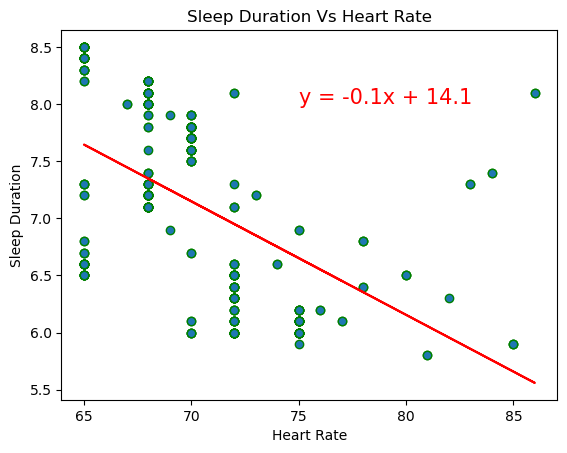

In [23]:
x_values = sleep_cleaned['Heart Rate']
y_values = sleep_cleaned['Sleep Duration']

# Incorporate the other graph properties
plot_lin_regress1(x_values,y_values,(75,8),'Sleep Duration', 'Heart Rate','Sleep Duration Vs Heart Rate','SleepHeartRate')

The r-squared is: 0.03254642457535411


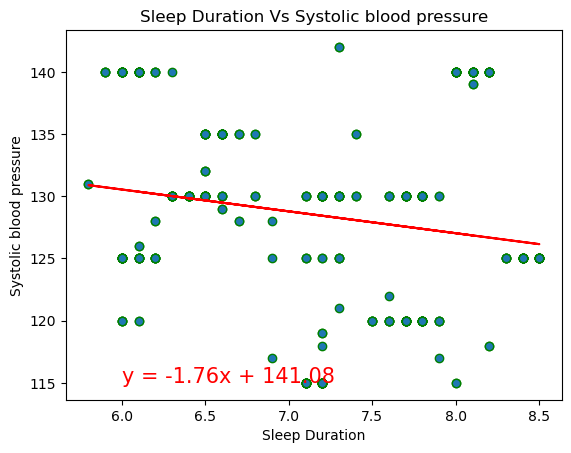

In [24]:
x_values = sleep_cleaned['Sleep Duration']
y_values = sleep_cleaned['systolic blood pressure']

# Incorporate the other graph properties
plot_lin_regress1(x_values,y_values,(6,115),'Systolic blood pressure','Sleep Duration','Sleep Duration Vs Systolic blood pressure','SystolicDuration')

The r-squared is: 0.027745521092980768


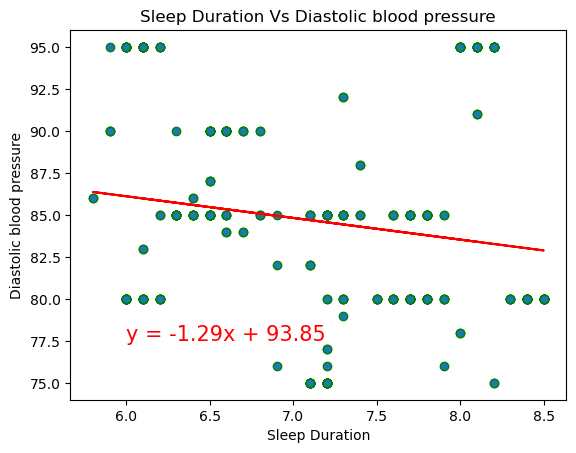

In [25]:
x_values = sleep_cleaned['Sleep Duration']
y_values = sleep_cleaned['diastolic blood pressure']

# Incorporate the other graph properties
plot_lin_regress1(x_values,y_values,(6,77.5),'Diastolic blood pressure','Sleep Duration','Sleep Duration Vs Diastolic blood pressure','DiastolicDuration')

In [26]:
#defining my linear regression model and function for Sleep Quality

def plot_lin_regress2(x_values,y_values,coords,xlabel,ylabel,title,num):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors="black",marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="blue")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"output_data/Fig{num}.png")
    plt.show()
    

The r-squared is: 0.4354214660524924


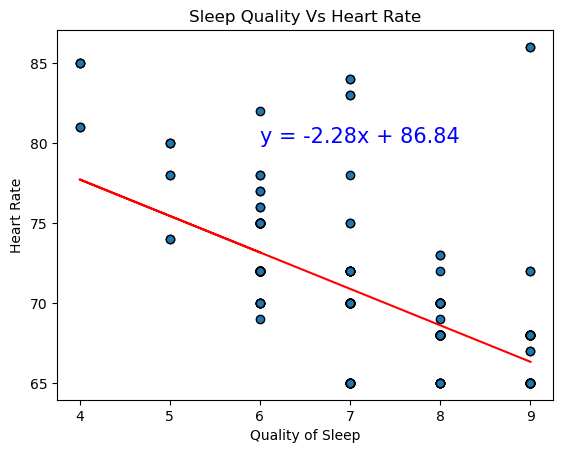

In [27]:
x_values = sleep_cleaned['Quality of Sleep']
y_values = sleep_cleaned['Heart Rate']

# Incorporate the other graph properties
plot_lin_regress2(x_values,y_values,(6,80),'Quality of Sleep','Heart Rate','Sleep Quality Vs Heart Rate','HeartRateQuality')

The r-squared is: 0.01479434248342167


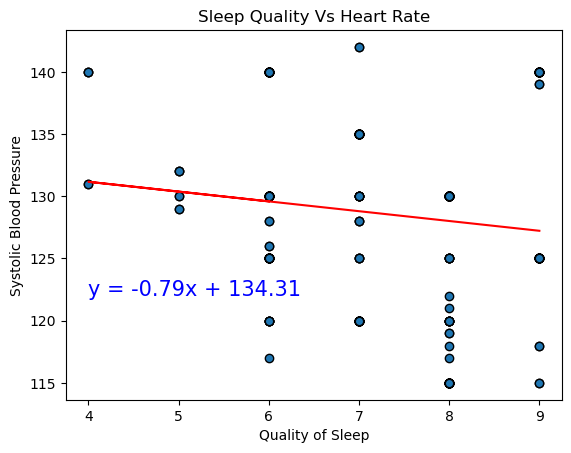

In [28]:
x_values = sleep_cleaned['Quality of Sleep']
y_values = sleep_cleaned['systolic blood pressure']

# Incorporate the other graph properties
plot_lin_regress2(x_values,y_values,(4,122),'Quality of Sleep','Systolic Blood Pressure','Sleep Quality Vs Heart Rate','SystolicQuality')

The r-squared is: 0.012133226761624103


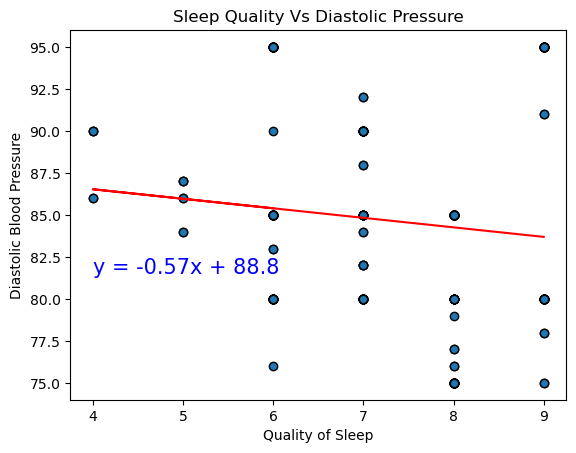

In [29]:
x_values = sleep_cleaned['Quality of Sleep']
y_values = sleep_cleaned['diastolic blood pressure']

# Incorporate the other graph properties
plot_lin_regress2(x_values,y_values,(4,81.5),'Quality of Sleep','Diastolic Blood Pressure','Sleep Quality Vs Diastolic Pressure','DiastolicQuality')

In [30]:
#defining my linear regression model and function for Heart Rate

def plot_lin_regress3(x_values,y_values,coords,xlabel,ylabel,title,num):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors="red",marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="blue")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"output_data/Fig{num}.png")
    plt.show()

The r-squared is: 0.07349099119283371


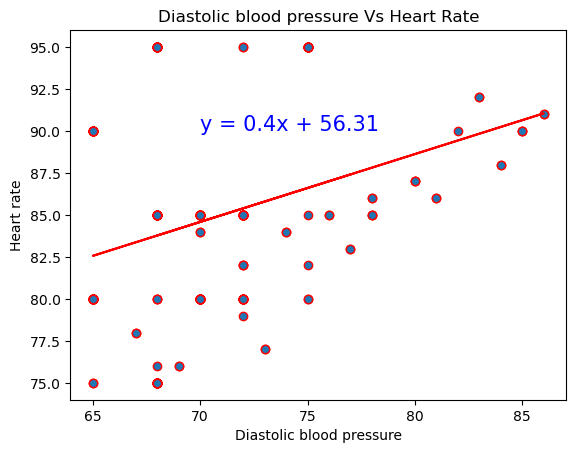

In [31]:
x_values = sleep_cleaned['Heart Rate']
y_values = sleep_cleaned['diastolic blood pressure']

plot_lin_regress3(x_values,y_values,(70,90),'Diastolic blood pressure','Heart rate','Diastolic blood pressure Vs Heart Rate','DiastolicHeartRate')

The r-squared is: 0.08652005812525031


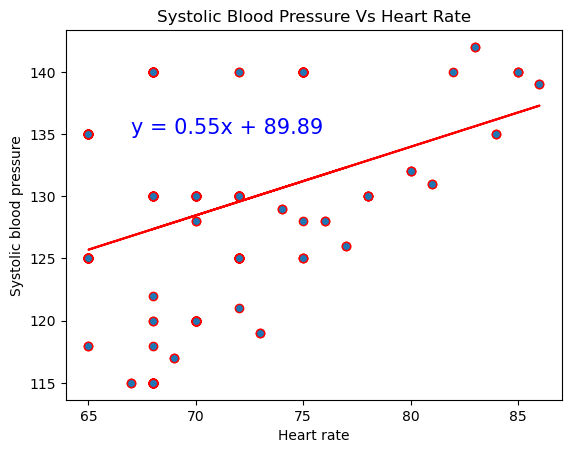

In [32]:
x_values = sleep_cleaned['Heart Rate']
y_values = sleep_cleaned['systolic blood pressure']

plot_lin_regress3(x_values,y_values,(67,135),'Heart rate','Systolic blood pressure','Systolic Blood Pressure Vs Heart Rate','SystolicHeartRate')

Findings from scatterplots:

The diastolic and systolic blood pressures show a similar trend of increasing alongside heartrate, signaling that there is a relationship between increased blood pressure when the heart is actively pumping (systolic) and when the pressure between pumps (diastolic) increases.

There is also an increase in Heart rate with less sleep duration, which is a symptom of Insomnia, and a decrease in reported quality of sleep associated with higher heart rates, a symptom of Sleep Apnea. 

Normal control group with no reported sleep disorders has the highest duration and quality of sleep patterns, with overall lower systolic and diastolic blood pressures. 


In [33]:
disorder = sleep_cleaned.groupby('Sleep Disorder').count()['Person ID']

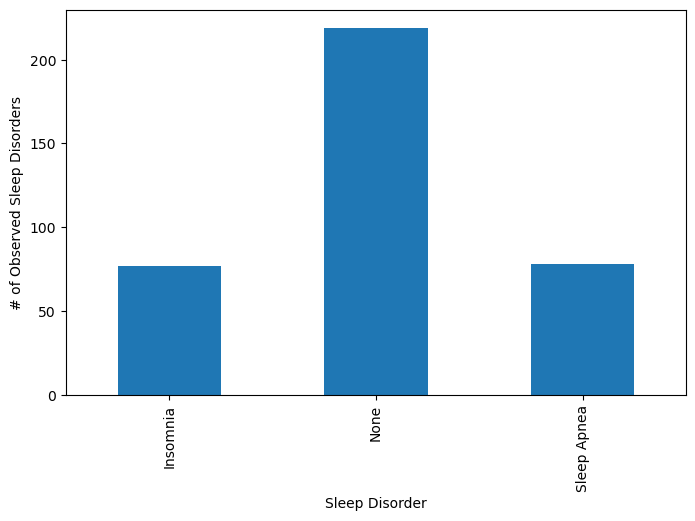

In [34]:
bar_plot = disorder.plot(kind="bar",figsize=(8,5))

bar_plot.set_xlabel("Sleep Disorder")
bar_plot.set_ylabel("# of Observed Sleep Disorders")

plt.show()

In [46]:
#boxplots 
# Put disorders into a list for for loop (and later for plot labels)

Disorders = ["None", "Insomnia", "Sleep Apnea"]

# Create empty list to fill with systolic blood pressure data (for plotting)

Disorder_sys = []

for disorder in Disorders:
    # Locate the rows which contain each disorder and get the systolic blood pressure 
    disorder_list = sleep_cleaned[sleep_cleaned['Sleep Disorder'] == disorder]
    
    # add subset 
    Disorder_sys.append(disorder_list['systolic blood pressure'])
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    
    quartiles = sleep_cleaned['systolic blood pressure'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_systolic = disorder_list.loc[(sleep_cleaned['systolic blood pressure'] < lower_bound) | (sleep_cleaned['systolic blood pressure'] > upper_bound)]
    outlier_systolic
    
    print(f"The lower quartile of {disorder} is: {lowerq}")
    print(f"The upper quartile of {disorder} is: {upperq}")
    print(f"The interquartile range of {disorder} is: {iqr}")
    print(f"The the median of {disorder} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


The lower quartile of None is: 125.0
The upper quartile of None is: 135.0
The interquartile range of None is: 10.0
The the median of None is: 130.0 
Values below 110.0 could be outliers.
Values above 150.0 could be outliers.
The lower quartile of Insomnia is: 125.0
The upper quartile of Insomnia is: 135.0
The interquartile range of Insomnia is: 10.0
The the median of Insomnia is: 130.0 
Values below 110.0 could be outliers.
Values above 150.0 could be outliers.
The lower quartile of Sleep Apnea is: 125.0
The upper quartile of Sleep Apnea is: 135.0
The interquartile range of Sleep Apnea is: 10.0
The the median of Sleep Apnea is: 130.0 
Values below 110.0 could be outliers.
Values above 150.0 could be outliers.


C:\Users\jessi\AppData\Local\Temp\ipykernel_19176\338011601.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])


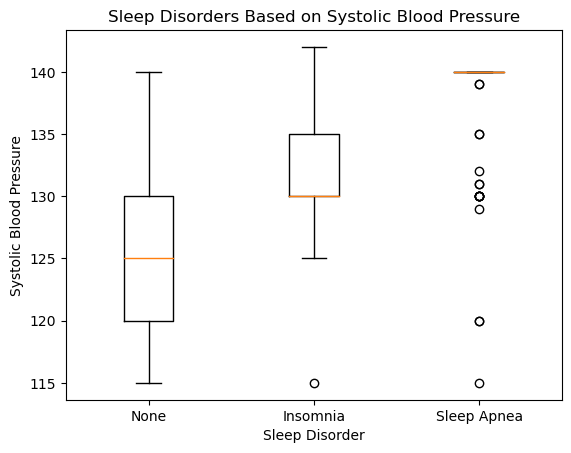

In [57]:
# Generate a box plot that shows the distrubution of the systolic blood pressure for each patient group.
#need more than one box plot on same chart 
fig1, ax1 = plt.subplots()
ax1.set_title('Sleep Disorders Based on Systolic Blood Pressure')
ax1.set_ylabel('Systolic Blood Pressure')
ax1.set_xlabel('Sleep Disorder')
ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])

#input the list I made with my for loop
ax1.boxplot(Disorder_sys)
plt.savefig(f"output_data/Fig.Sys.Boxplot.png")
plt.show()

In [48]:
#boxplots 
# Put disorders into a list for for loop (and later for plot labels)

Disorders = ["None", "Insomnia", "Sleep Apnea"]

# Create empty list to fill with systolic blood pressure data (for plotting)

Disorder_dia = []

for disorder in Disorders:
    # Locate the rows which contain each disorder and get the systolic blood pressure 
    disorder_list = sleep_cleaned[sleep_cleaned['Sleep Disorder'] == disorder]
    
    # add subset 
    Disorder_dia.append(disorder_list['diastolic blood pressure'])
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    
    quartiles = sleep_cleaned['diastolic blood pressure'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_diastolic = disorder_list.loc[(sleep_cleaned['diastolic blood pressure'] < lower_bound) | (sleep_cleaned['diastolic blood pressure'] > upper_bound)]
    outlier_diastolic
    
    print(f"The lower quartile of {disorder} is: {lowerq}")
    print(f"The upper quartile of {disorder} is: {upperq}")
    print(f"The interquartile range of {disorder} is: {iqr}")
    print(f"The the median of {disorder} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of None is: 80.0
The upper quartile of None is: 90.0
The interquartile range of None is: 10.0
The the median of None is: 85.0 
Values below 65.0 could be outliers.
Values above 105.0 could be outliers.
The lower quartile of Insomnia is: 80.0
The upper quartile of Insomnia is: 90.0
The interquartile range of Insomnia is: 10.0
The the median of Insomnia is: 85.0 
Values below 65.0 could be outliers.
Values above 105.0 could be outliers.
The lower quartile of Sleep Apnea is: 80.0
The upper quartile of Sleep Apnea is: 90.0
The interquartile range of Sleep Apnea is: 10.0
The the median of Sleep Apnea is: 85.0 
Values below 65.0 could be outliers.
Values above 105.0 could be outliers.


C:\Users\jessi\AppData\Local\Temp\ipykernel_19176\3122119230.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])


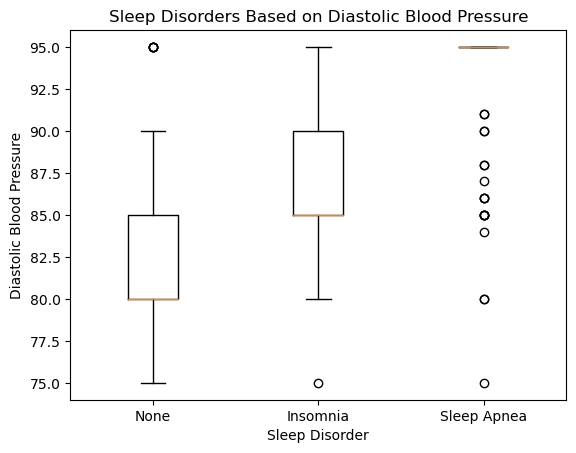

In [58]:
# Generate a box plot that shows the distrubution of the diastolic blood pressure for each patient group.
#need more than one box plot on same chart 
fig1, ax1 = plt.subplots()
ax1.set_title('Sleep Disorders Based on Diastolic Blood Pressure')
ax1.set_ylabel('Diastolic Blood Pressure')
ax1.set_xlabel('Sleep Disorder')
ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])

#input the list I made with my for loop
ax1.boxplot(Disorder_dia)
plt.savefig(f"output_data/Fig.Dia.Boxplot.png")
plt.show()

In [55]:
# Put disorders into a list for for loop (and later for plot labels)

Disorders = ["None", "Insomnia", "Sleep Apnea"]

# Create empty list to fill with heart rate data (for plotting)

Disorder_heart = []

for disorder in Disorders:
    # Locate the rows which contain each disorder and get the heart rate
    disorder_list = sleep_cleaned[sleep_cleaned['Sleep Disorder'] == disorder]
    
    # add subset 
    Disorder_heart.append(disorder_list['Heart Rate'])
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    
    quartiles = sleep_cleaned['Heart Rate'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_heart = disorder_list.loc[(sleep_cleaned['Heart Rate'] < lower_bound) | (sleep_cleaned['Heart Rate'] > upper_bound)]
    outlier_heart
    
    print(f"The lower quartile of {disorder} is: {lowerq}")
    print(f"The upper quartile of {disorder} is: {upperq}")
    print(f"The interquartile range of {disorder} is: {iqr}")
    print(f"The the median of {disorder} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of None is: 68.0
The upper quartile of None is: 72.0
The interquartile range of None is: 4.0
The the median of None is: 70.0 
Values below 62.0 could be outliers.
Values above 78.0 could be outliers.
The lower quartile of Insomnia is: 68.0
The upper quartile of Insomnia is: 72.0
The interquartile range of Insomnia is: 4.0
The the median of Insomnia is: 70.0 
Values below 62.0 could be outliers.
Values above 78.0 could be outliers.
The lower quartile of Sleep Apnea is: 68.0
The upper quartile of Sleep Apnea is: 72.0
The interquartile range of Sleep Apnea is: 4.0
The the median of Sleep Apnea is: 70.0 
Values below 62.0 could be outliers.
Values above 78.0 could be outliers.


C:\Users\jessi\AppData\Local\Temp\ipykernel_19176\749450220.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])


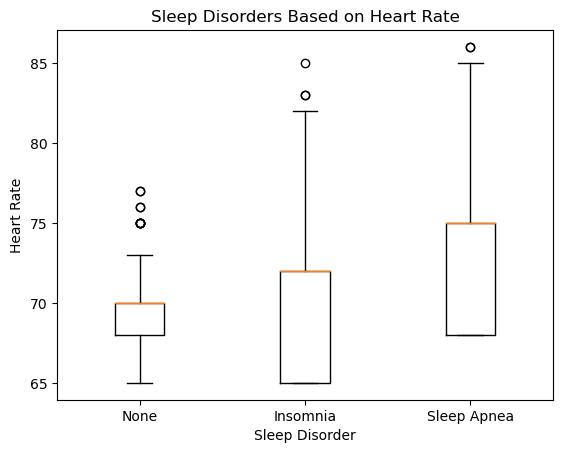

In [59]:
# Generate a box plot that shows the distrubution of the heart rate for each patient group.
#need more than one box plot on same chart 
fig1, ax1 = plt.subplots()
ax1.set_title('Sleep Disorders Based on Heart Rate')
ax1.set_ylabel('Heart Rate')
ax1.set_xlabel('Sleep Disorder')
ax1.set_xticklabels(["None", "Insomnia", "Sleep Apnea"])

#input the list I made with my for loop
ax1.boxplot(Disorder_heart)
plt.savefig(f"output_data/Fig.HeartRate.Boxplot.png")
plt.show()

In [75]:
sleep_data_pd.groupby('BMI Category').count()['Person ID']

BMI Category
Normal           195
Normal Weight     21
Obese             10
Overweight       148
Name: Person ID, dtype: int64

In [72]:
weights = sleep_data_pd.groupby('BMI Category').count()['Person ID']

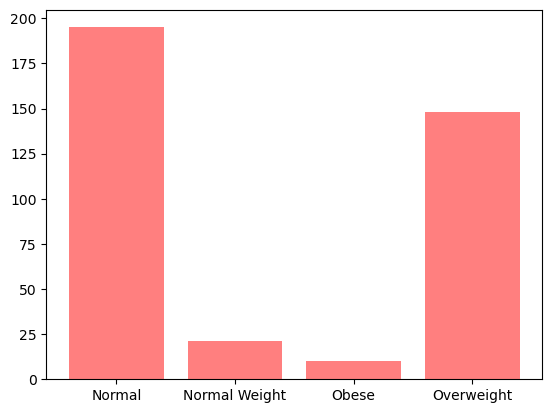

In [76]:
x_axis = np.arange(len(weights))

plt.bar(x_axis, weights, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Normal','Normal Weight','Obese','Overweight'])
plt.show()

In [80]:
stress = sleep_data_pd.groupby('Stress Level').count()['Person ID']